Text(0.5, 1.0, 'Histogram')

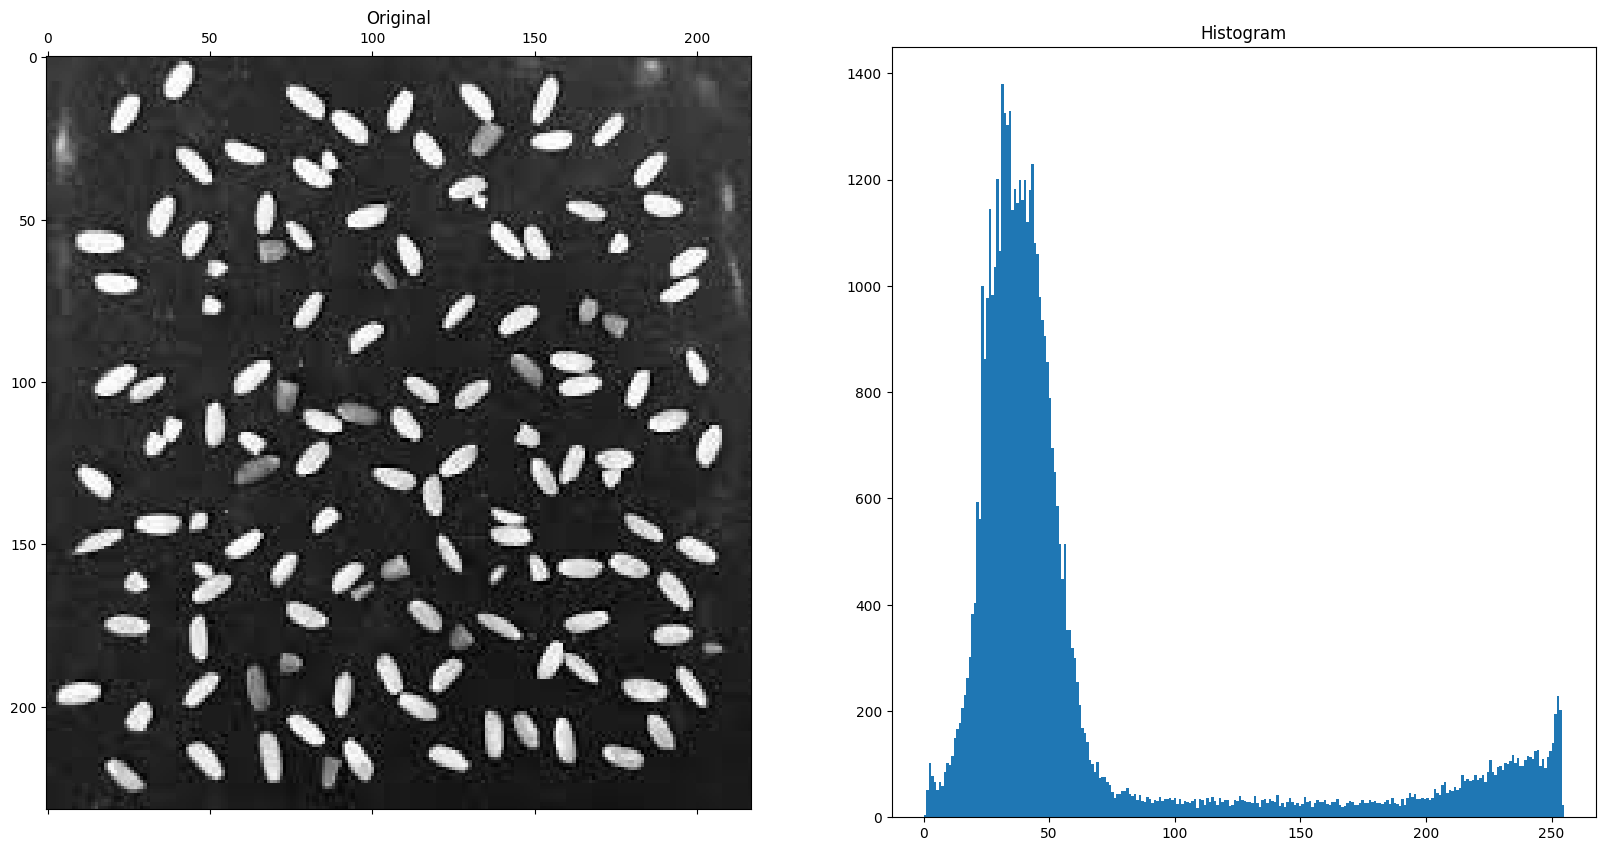

In [2]:
#Import libraries
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 
#Read image file
img = Image.open('rice.jpeg').convert('L')
#Show image and Histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.matshow(img, cmap='gray')
ax1.set_title('Original')

ax2.hist(img.getdata(), bins=256)
ax2.set_title('Histogram')

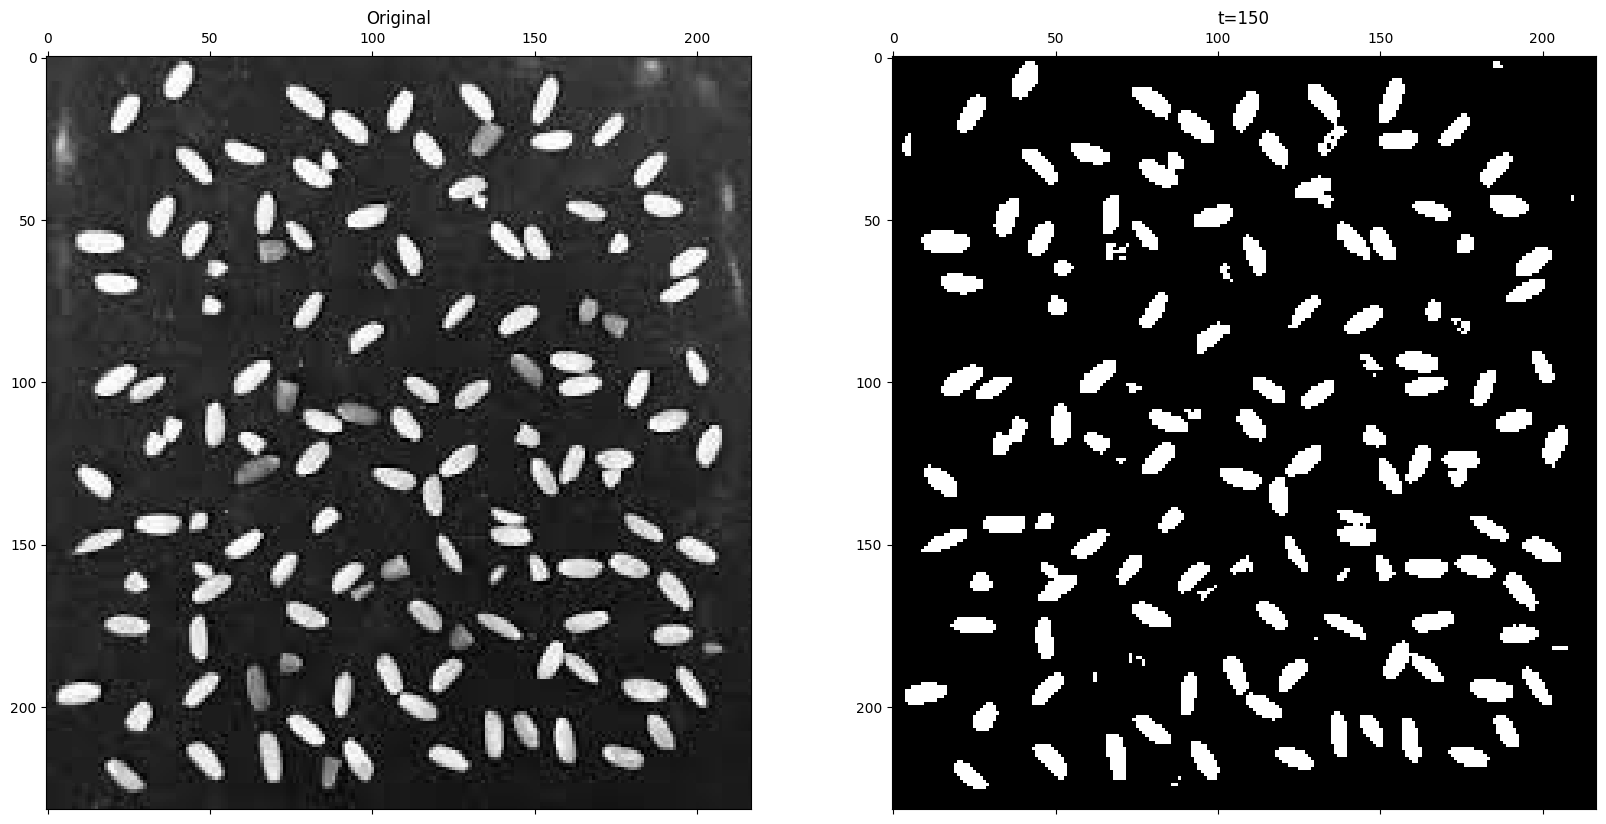

In [3]:
# Threshold (manual) and create binary image
def threshold(img, t):
    img_bin = Image.new('1', img.size, color=0)
    for y in range(img.height):
        for x in range(img.width):
            value = img.getpixel((x, y))
            if value > t:
                img_bin.putpixel((x, y), 1)
    
    return img_bin
#Show original and threshold image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.matshow(img, cmap='gray')
ax1.set_title('Original')

ax2.matshow(threshold(img, 150), cmap='gray')
ax2.set_title('t=150')

img_bin = threshold(img, 150)

In [4]:
# Particle counting

img_seg = Image.new('I', img.size, color = -1)

for y in range(img_bin.height):
    for x in range(img_bin.width):
        if img_bin.getpixel((x, y)) > 0:
            img_seg.putpixel((x, y), 0)

index = 1
for y in range(img_seg.height - 1):
    for x in range(img_seg.width - 1):
        v0 = img_seg.getpixel((x, y))
        vx = img_seg.getpixel((x + 1, y))
        vy = img_seg.getpixel((x, y + 1))

        if v0 == 0:
            if vx > 0:
                v0 = vx
            else:
                v0 = index
                index += 1

            img_seg.putpixel((x, y), v0)

        if v0 > 0 and vx > 0 and v0 != vx:
            for yy in range(y + 1):
                for xx in range(x + 1):
                    if img_seg.getpixel((xx, yy)) == v0:
                        img_seg.putpixel((xx, yy), vx)
            
            v0 = vx

        if v0 > 0 and vx == 0:
            img_seg.putpixel((x + 1, y), v0)

        if v0 > 0 and vy == 0:
            img_seg.putpixel((x, y + 1), v0)

# Calculate particle size & boundaries
particles = [(0, 0, 0, 0, 0) for p in range(index - 1)]

for y in range(img_seg.height):
    for x in range(img_seg.width):
        v = img_seg.getpixel((x, y))

        if v > 0:
            i = v - 1

            (x0, y0, x1, y1, count) = particles[i]

            if x0 == 0 or x < x0:
                x0 = x
            
            if y0 == 0 or y < y0:
                y0 = y

            if x > x1:
                x1 = x

            if y > y1:
                y1 = y

            particles[i] = (x0, y0, x1, y1, count + 1)


199
130 detected in the image


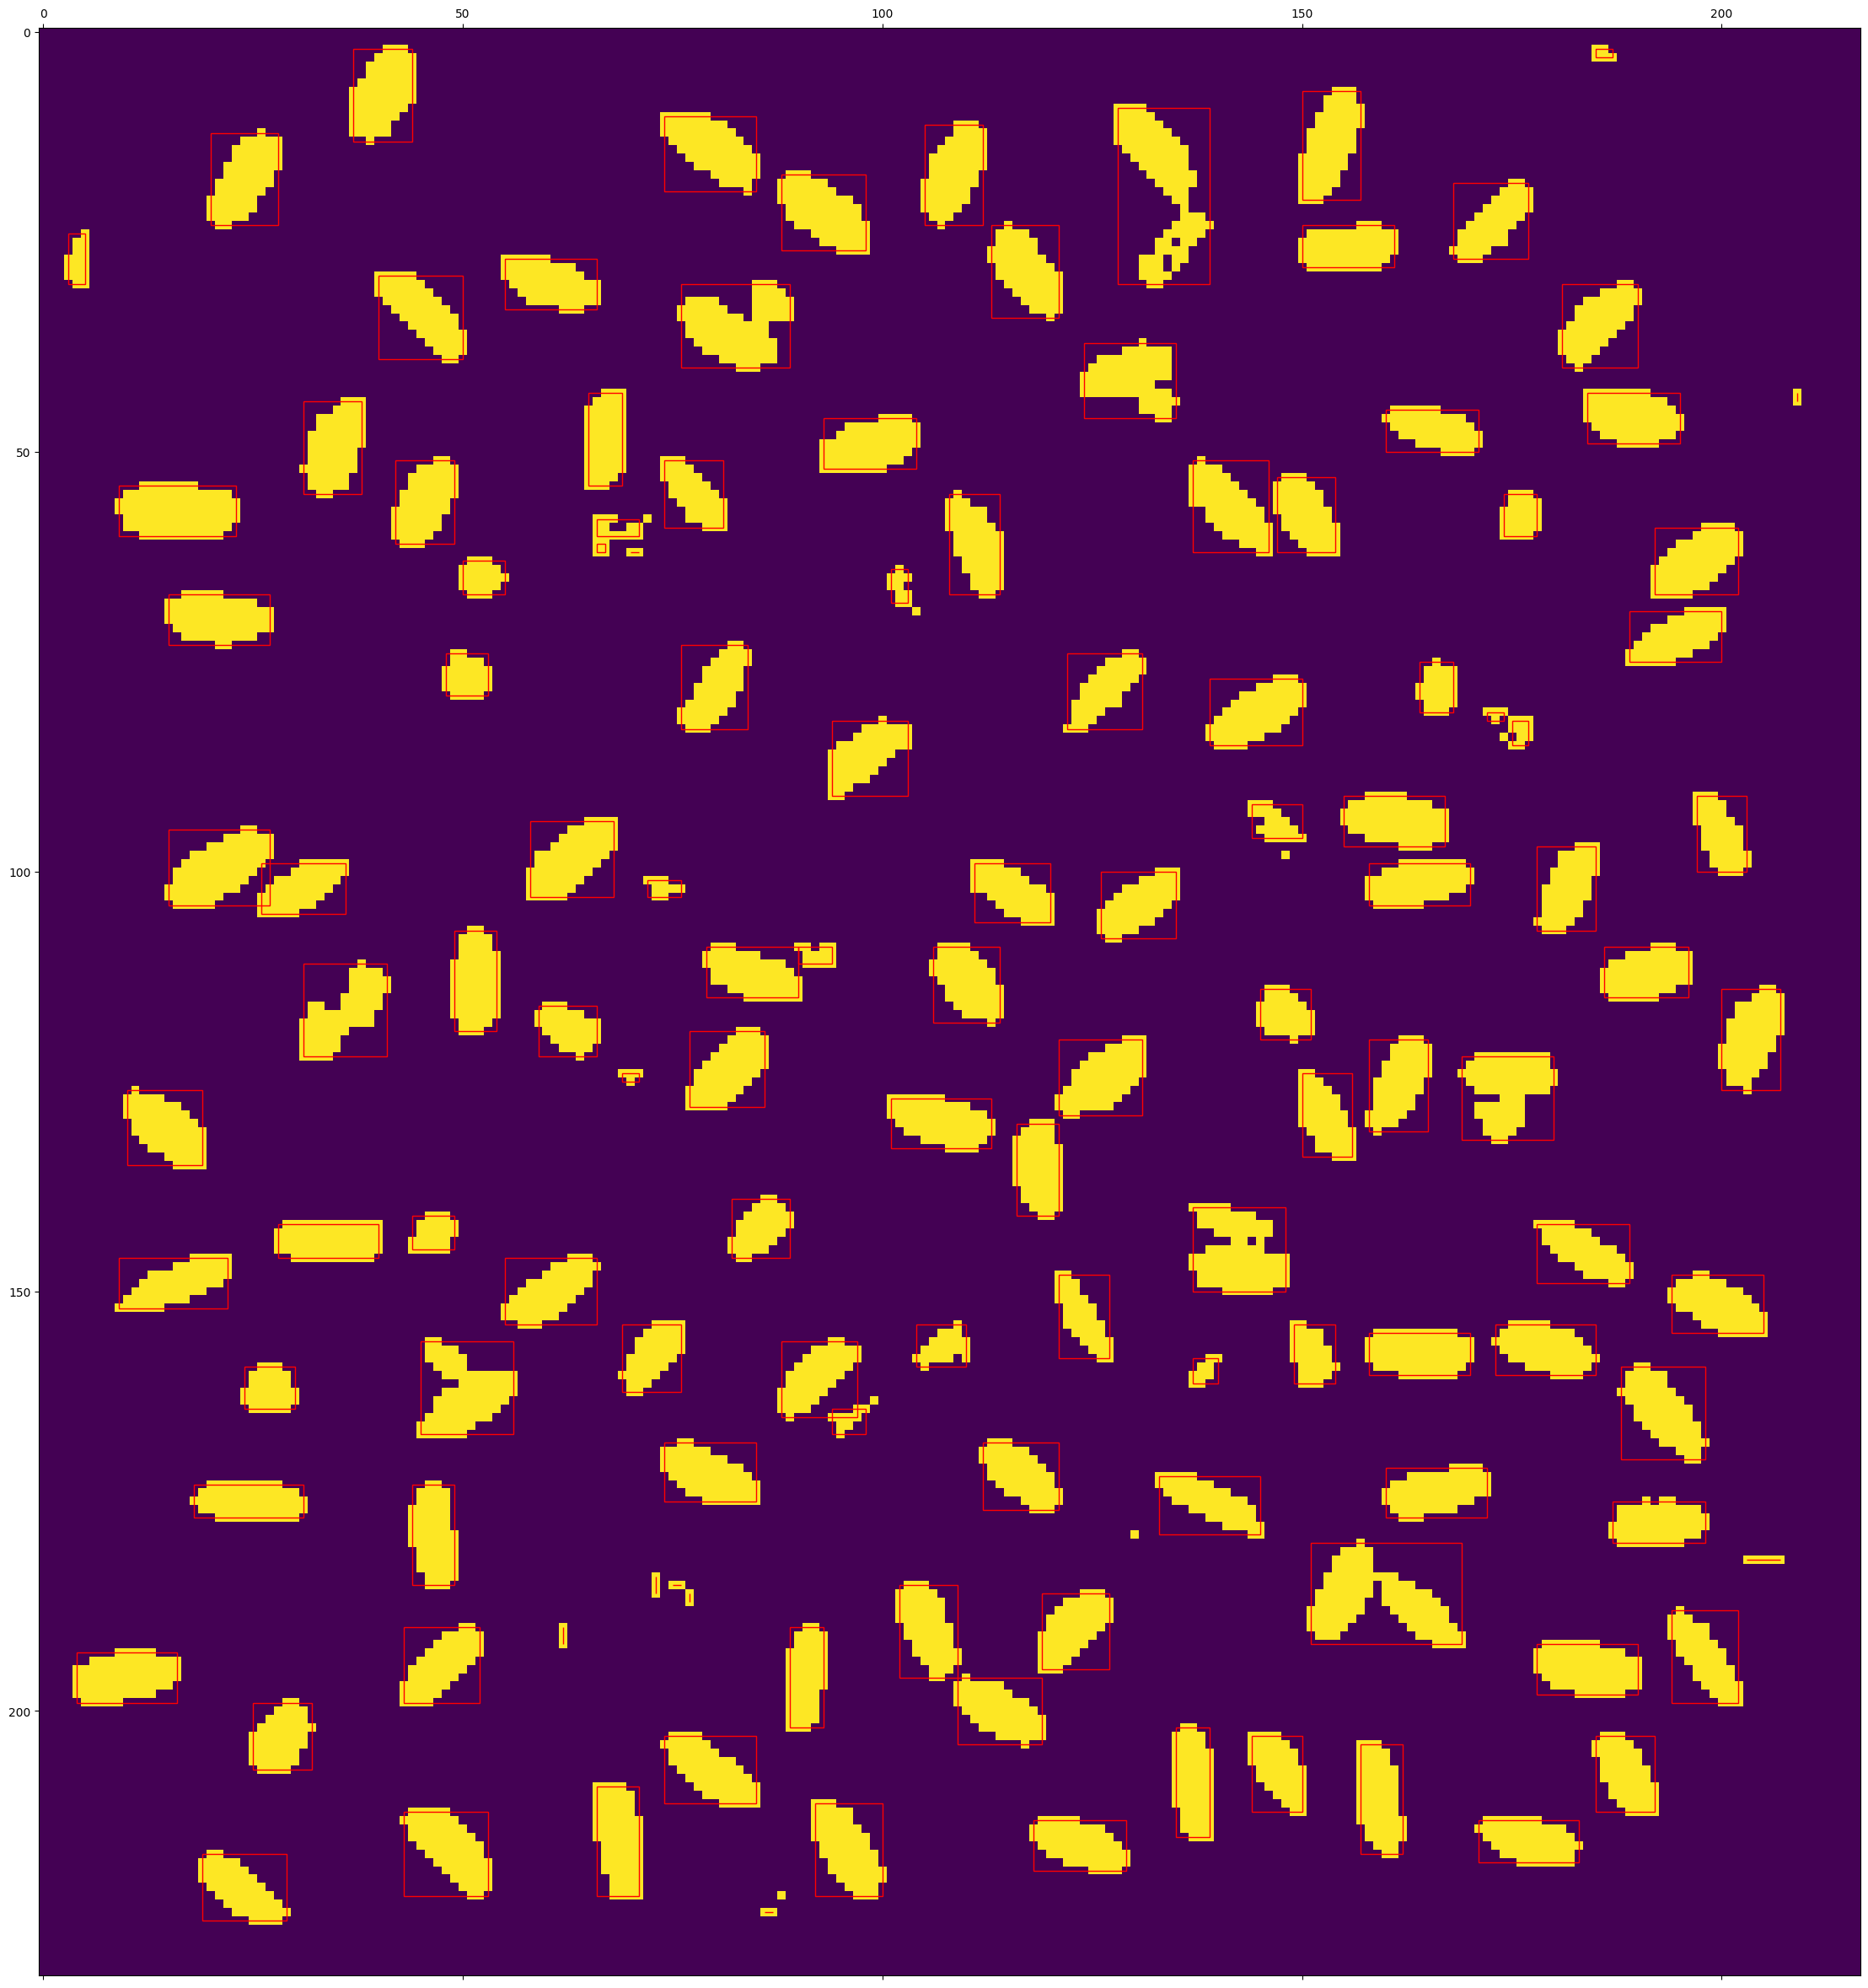

In [5]:
#Show image binary with the detected particles
fig, ax = plt.subplots(figsize=(30,30))
ax.matshow(img_bin)
for (x0, y0, x1, y1, count) in particles:
    w = x1 - x0
    h = y1 - y0
    rect = patches.Rectangle((x0, y0), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
#Show number of particles
print(len(particles))